<a href="https://colab.research.google.com/github/saka-21/colab_sample/blob/main/exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 演習
Kerasを使って、ディープラーニングのモデルを構築します。  
今回もIrisの分類を行います。  
指定した通りに、セルにPythonのコードを記述しましょう。

## データの準備
最初に、以下のセルを実行しましょう。  
ただし、コードは変更しないでください。

In [2]:
import numpy as np
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

iris = datasets.load_iris()

scaler = preprocessing.StandardScaler() 
scaler.fit(iris.data)

x = scaler.transform(iris.data)
t = np_utils.to_categorical(iris.target)

x_train, x_test, t_train, t_test = train_test_split(x, t, train_size=0.75)

## モデルの構築
`mode.summary()`により以下の結果が表示されるモデルを構築しましょう。

$$
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
dense_1 (Dense)              (None, 16)                80        
_________________________________________________________________
activation_1 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
activation_2 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 51        
_________________________________________________________________
activation_3 (Activation)    (None, 3)                 0         
=================================================================
Total params: 403
Trainable params: 403
Non-trainable params: 0
_________________________________________________________________
None
$$

以下のセルの、指定した箇所にコードを追記してください。

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential() # モデルの作成
# --- ここからコードを書く ---
model.add(Dense(16, input_dim=4))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
# --- ここまで ---
model.add(Dense(3))
model.add(Activation('softmax')) 
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy']) # モデルのコンパイル

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                80        
_________________________________________________________________
activation_3 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
activation_4 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 51        
_________________________________________________________________
activation_5 (Activation)    (None, 3)                 0         
Total params: 403
Trainable params: 403
Non-trainable params: 0
________________________________________________________

## 学習
構築したモデルを訓練しましょう。

In [4]:
history = model.fit(x_train, t_train, epochs=30, batch_size=8)

Epoch 1/30
14/14 [==============================] - 1s 1ms/step - loss: 1.0084 - accuracy: 0.4710
Epoch 2/30
14/14 [==============================] - 0s 1ms/step - loss: 0.9616 - accuracy: 0.5730
Epoch 3/30
14/14 [==============================] - 0s 1ms/step - loss: 0.9019 - accuracy: 0.6949
Epoch 4/30
14/14 [==============================] - 0s 1ms/step - loss: 0.9005 - accuracy: 0.6869
Epoch 5/30
14/14 [==============================] - 0s 1ms/step - loss: 0.8508 - accuracy: 0.7648
Epoch 6/30
14/14 [==============================] - 0s 1ms/step - loss: 0.7827 - accuracy: 0.8380
Epoch 7/30
14/14 [==============================] - 0s 1ms/step - loss: 0.7944 - accuracy: 0.7593
Epoch 8/30
14/14 [==============================] - 0s 1ms/step - loss: 0.7039 - accuracy: 0.8463
Epoch 9/30
14/14 [==============================] - 0s 2ms/step - loss: 0.7247 - accuracy: 0.7822
Epoch 10/30
14/14 [==============================] - 0s 1ms/step - loss: 0.6827 - accuracy: 0.8559
Epoch 11/30
14/14 [

## 学習の推移
学習が問題なく行われたことを確認するために、学習の推移を見ましょう。

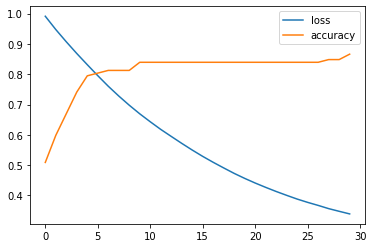

In [6]:
import matplotlib.pyplot as plt

hist_loss = history.history['loss']  # 訓練用データの誤差
hist_acc = history.history['accuracy']  # 検証用データの誤差

plt.plot(np.arange(len(hist_loss)), hist_loss, label='loss')
plt.plot(np.arange(len(hist_acc)), hist_acc, label='accuracy')
plt.legend()
plt.show()

## 評価
モデルの評価を行いましょう。

In [7]:
loss, accuracy = model.evaluate(x_test, t_test)
print(loss, accuracy)

2/2 [==============================] - 0s 6ms/step - loss: 0.3632 - accuracy: 0.8421
0.3632066547870636 0.8421052694320679


## 予測
学習済みのモデルを使って、予測を行いましょう。  

In [8]:
model.predict(x_test)

array([[0.05487047, 0.11554477, 0.8295847 ],
       [0.0690005 , 0.77297235, 0.1580272 ],
       [0.1385269 , 0.5891335 , 0.27233952],
       [0.09683638, 0.33599013, 0.5671735 ],
       [0.14556584, 0.6562405 , 0.19819358],
       [0.10343509, 0.1183269 , 0.778238  ],
       [0.15896171, 0.6928505 , 0.1481878 ],
       [0.10099567, 0.5125976 , 0.3864067 ],
       [0.08200376, 0.2882461 , 0.62975013],
       [0.03969486, 0.12849025, 0.8318148 ],
       [0.04879959, 0.10755526, 0.8436451 ],
       [0.97703654, 0.0125231 , 0.01044043],
       [0.06635454, 0.16034882, 0.7732967 ],
       [0.95812   , 0.03415607, 0.00772388],
       [0.9647414 , 0.02028595, 0.01497267],
       [0.03991044, 0.8162245 , 0.143865  ],
       [0.97802985, 0.01813187, 0.00383829],
       [0.950747  , 0.00670634, 0.04254666],
       [0.17367847, 0.40021938, 0.42610213],
       [0.976995  , 0.01846347, 0.00454153],
       [0.9711468 , 0.01513478, 0.01371835],
       [0.01532869, 0.06715276, 0.91751856],
       [0.

# 解答例
以下は解答例です。  
どうしてもわからない時のみ、参考にしましょう。

In [ ]:
# --- ここからコードを書く ---
model.add(Dense(16, input_dim=4))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
# --- ここまで ---